# DecisionTreeClassifier ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WSN.csv')
df.head()

,id,Time,Is_CH,who_CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned_Energy,Attack_type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [3]:
df=df.dropna()

In [4]:
df.columns

Index([' id', ' Time', ' Is_CH', ' who_CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned_Energy',
       'Attack_type'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Attack_type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
df = df.drop_duplicates()

In [7]:
x1 = df.drop(labels='Attack_type', axis=1)
y1 = df.loc[:,'Attack_type']

In [8]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros =RandomUnderSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({3: 332040, 2: 13909, 0: 10049, 4: 6633, 1: 3157})
OVER SAMPLING DATA COUNT  :  Counter({0: 3157, 1: 3157, 2: 3157, 3: 3157, 4: 3157})


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  12628
NUMBER OF TEST DATASET      :  3157
TOTAL NUMBER OF DATASET    :  15785


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
BNB = DecisionTreeClassifier()
BNB.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
predicted = BNB.predict(x_test)

In [13]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF DecisionTreeClassifier:\n\n',cr)

#This indicates that the model makes very few false positive predictions for each class.(precision)
#It's the ratio of true positive predictions to the total actual positives.(recall)

THE CLASSIFICATION REPORT OF DecisionTreeClassifier:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98       632
           1       1.00      0.99      1.00       631
           2       0.98      0.98      0.98       631
           3       0.95      0.93      0.94       632
           4       0.93      0.96      0.95       631

    accuracy                           0.97      3157
   macro avg       0.97      0.97      0.97      3157
weighted avg       0.97      0.97      0.97      3157



In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
cm
# print('THE CONFUSION MATRIX SCORE OF DecisionTreeClassifier :\n\n\n',cm)

array([[623,   0,   9,   0,   0],
       [  0, 627,   0,   4,   0],
       [  9,   0, 617,   4,   1],
       [  0,   1,   3, 588,  40],
       [  1,   0,   1,  28, 601]], dtype=int64)

In [15]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(BNB, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [96.8641115  96.67405765 96.83243586 96.8641115  96.80076022]


In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF DecisionTreeClassifier IS :",a*100)

THE ACCURACY SCORE OF DecisionTreeClassifier IS : 96.80076021539436


In [17]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF DecisionTreeClassifier IS :",hl*100)

THE HAMMING LOSS OF DecisionTreeClassifier IS : 3.199239784605638


THE CONFUSION MATRIX SCORE OF DecisionTreeClassifier:


[[623   0   9   0   0]
 [  0 627   0   4   0]
 [  9   0 617   4   1]
 [  0   1   3 588  40]
 [  1   0   1  28 601]]


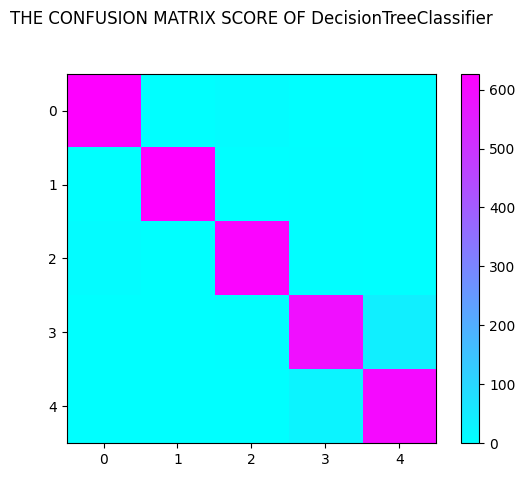

In [18]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF DecisionTreeClassifier\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF DecisionTreeClassifier:\n\n')
print(cm)
plot_confusion_matrix(cm)

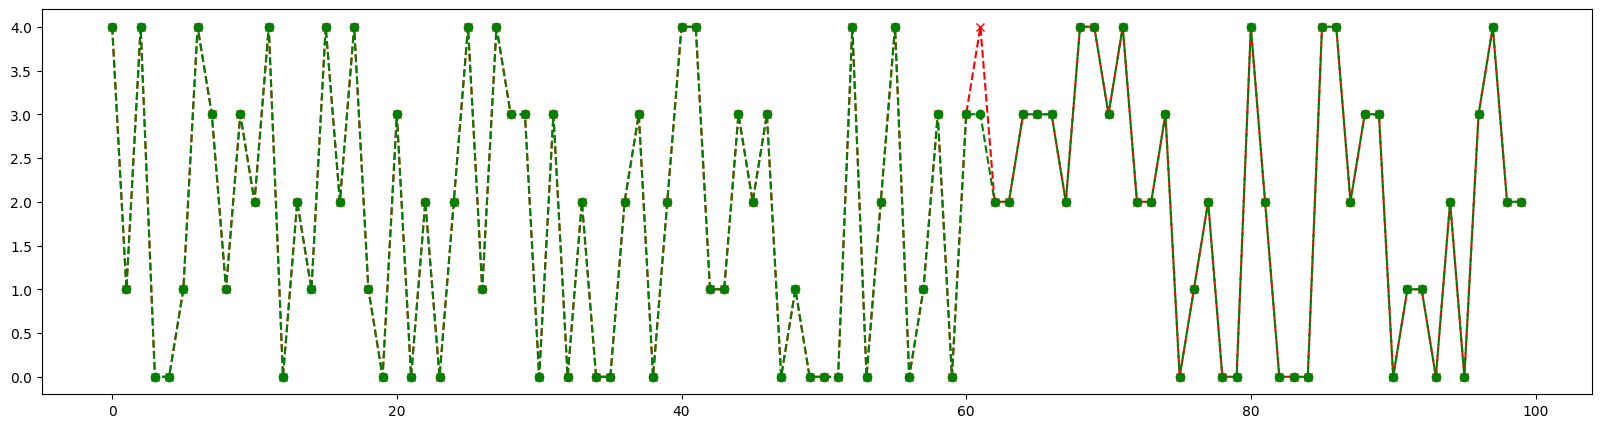

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [20]:
#It visualizes the model's predictions (in red) and the actual target values (in green) 